In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

## Match journal requirements for a san serif font
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

## TrueType for Adobe Illustrator to understand text
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


csv_file = "../csv/2022-12-01_ER-contacts.csv"
df = pd.read_csv(csv_file)
df["Distance"] = df["Distance"].str.replace("nm", "")
df.head()

,Voxel count,Max Feret Diameter (nm),Distance,Contact_Type,Distance to closest DSM (nm)
0,1.0,6.928113,12,ER-KRT,3605.127404
1,1.0,6.928113,12,ER-KRT,353.315727
2,1.0,6.928129,12,ER-KRT,665.684638
3,1.0,6.928146,12,ER-KRT,734.661796
4,1.0,6.928113,12,ER-KRT,2320.875865


## How far away from desmosomes are the contacts between ER and KRT/MT?

Note: The apparent cut-off is due to the limited coverage of the FIBSEM dataset.

- We see bimodal distributions.
- When considering contacts close to desmosomes ( $< 1 \mu m$), there are more `ER-KRT` contacts.


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


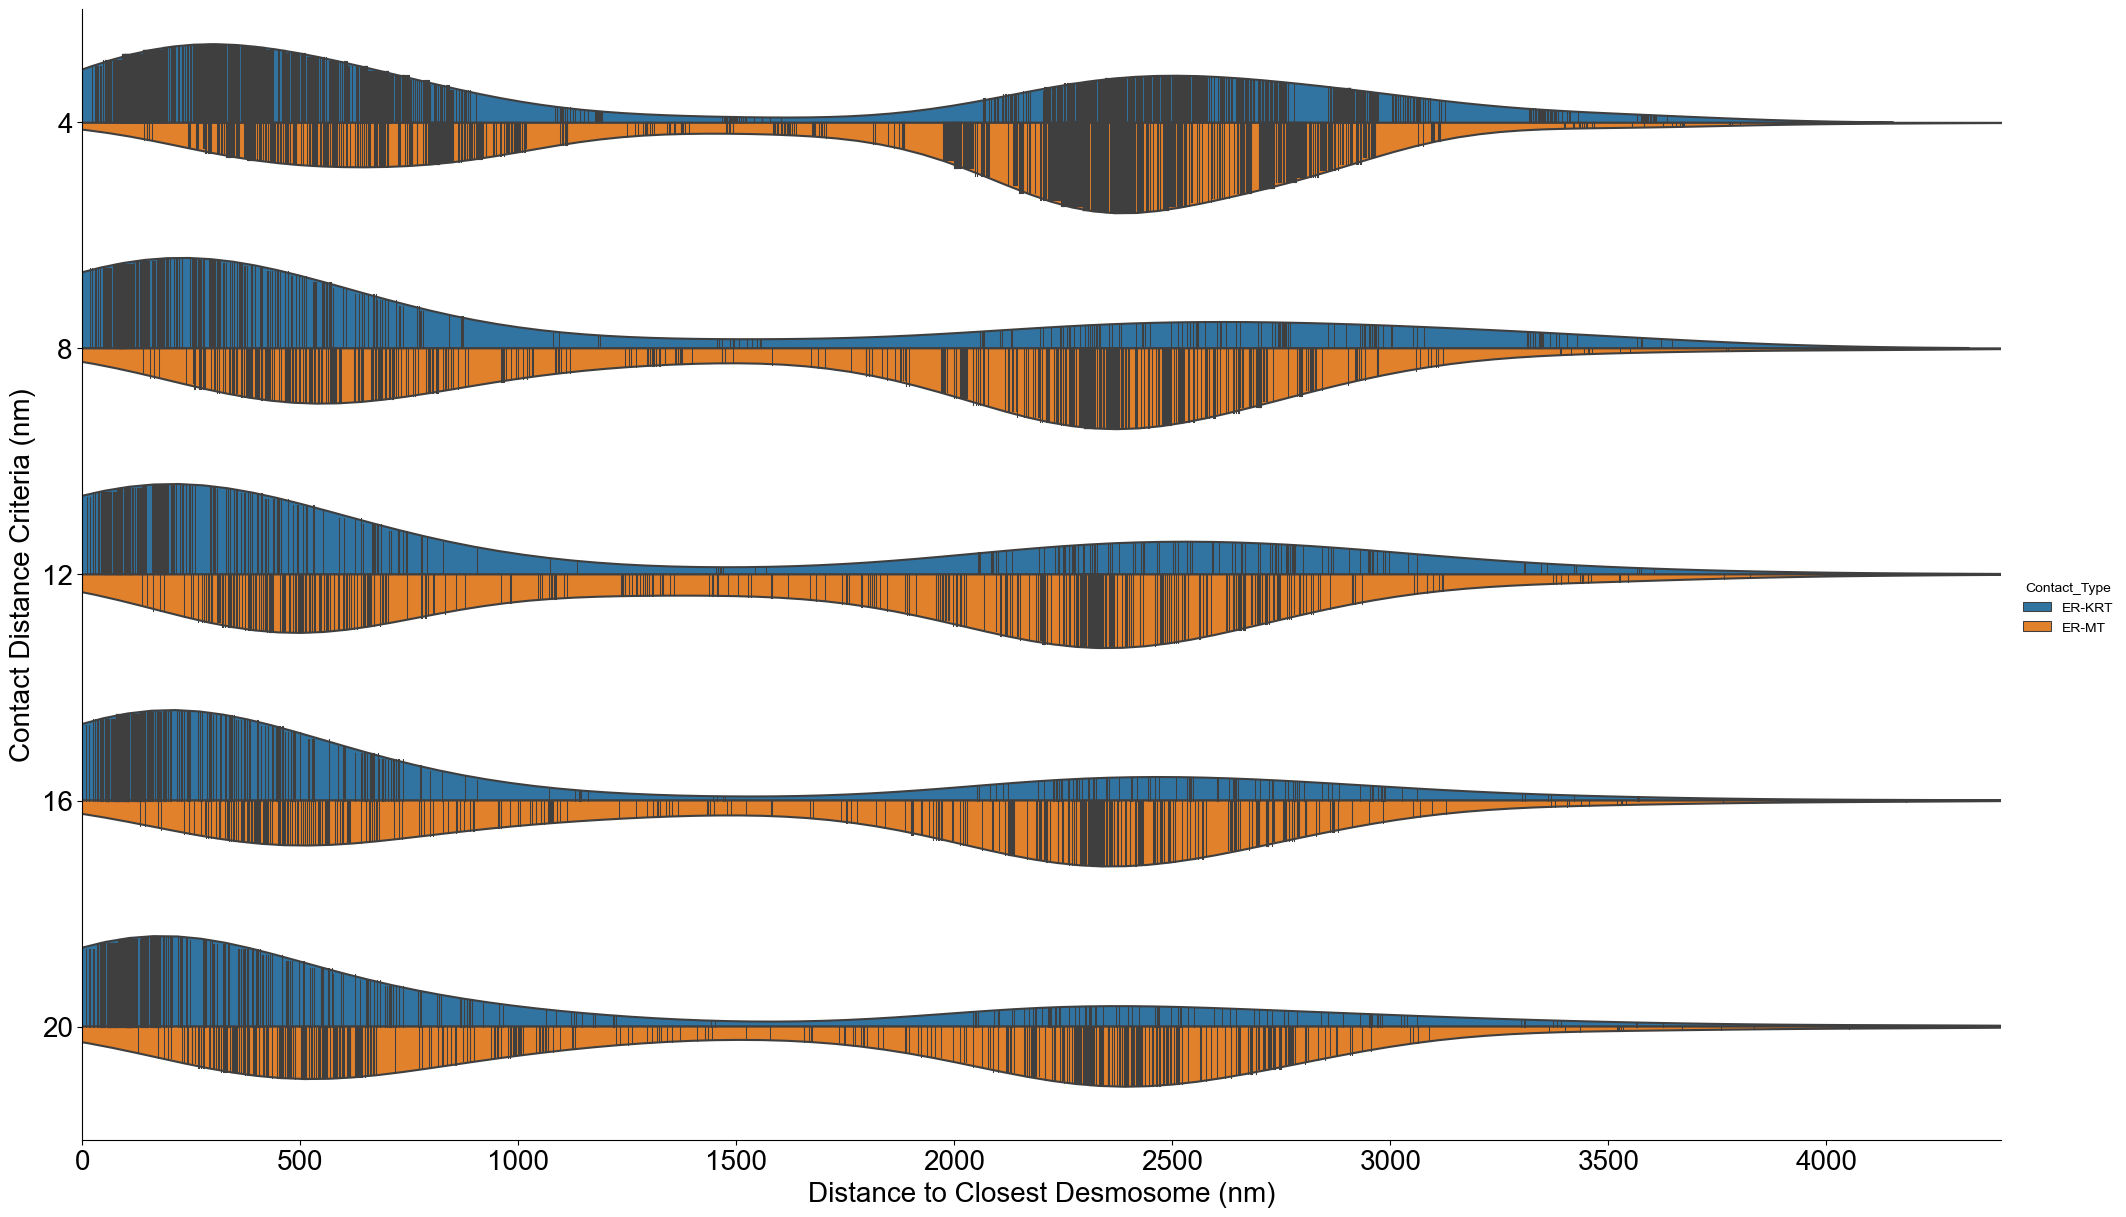

In [2]:
a = sns.catplot(
data = df,
    x = "Distance to closest DSM (nm)",
    y = "Distance",
    hue = "Contact_Type",
    kind = "violin",
    inner = "stick",
    order = ["4", "8", "12", "16", "20"],
    split = True,
    #figsize = [20, 15],
    height = 12,
    aspect = 20/12,
)
a.set(xlim=(0, 4400))

fontsize_label = 20
fontsize_tick = 20

plt.tick_params(axis='both', which='major', labelsize = fontsize_tick)
plt.ylabel("Contact Distance Criteria (nm)", fontsize = fontsize_label)
plt.xlabel("Distance to Closest Desmosome (nm)", fontsize = fontsize_label)

plt.savefig("../plots/DSM-3_Contacts_between_ER-KRT_and_ER-MT_transparent.pdf", 
            transparent = True,
            bbox_inches="tight")
plt.savefig("../plots/DSM-3_Contacts_between_ER-KRT_and_ER-MT.pdf",
            bbox_inches="tight")

(0.0, 4400.0)

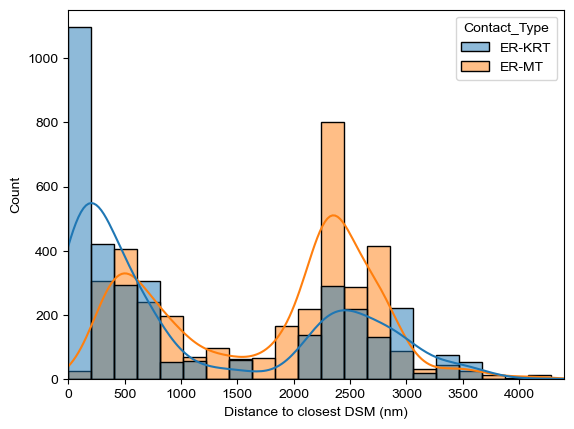

In [3]:
s = sns.histplot(df,
                 x="Distance to closest DSM (nm)",
                 hue="Contact_Type",
                 kde=True,
                 #fill=False,
                )
s.set_xlim(0, 4400)

### ER-KRT contacts are more plentiful near desmosomes.
Binwidth of 12nm

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


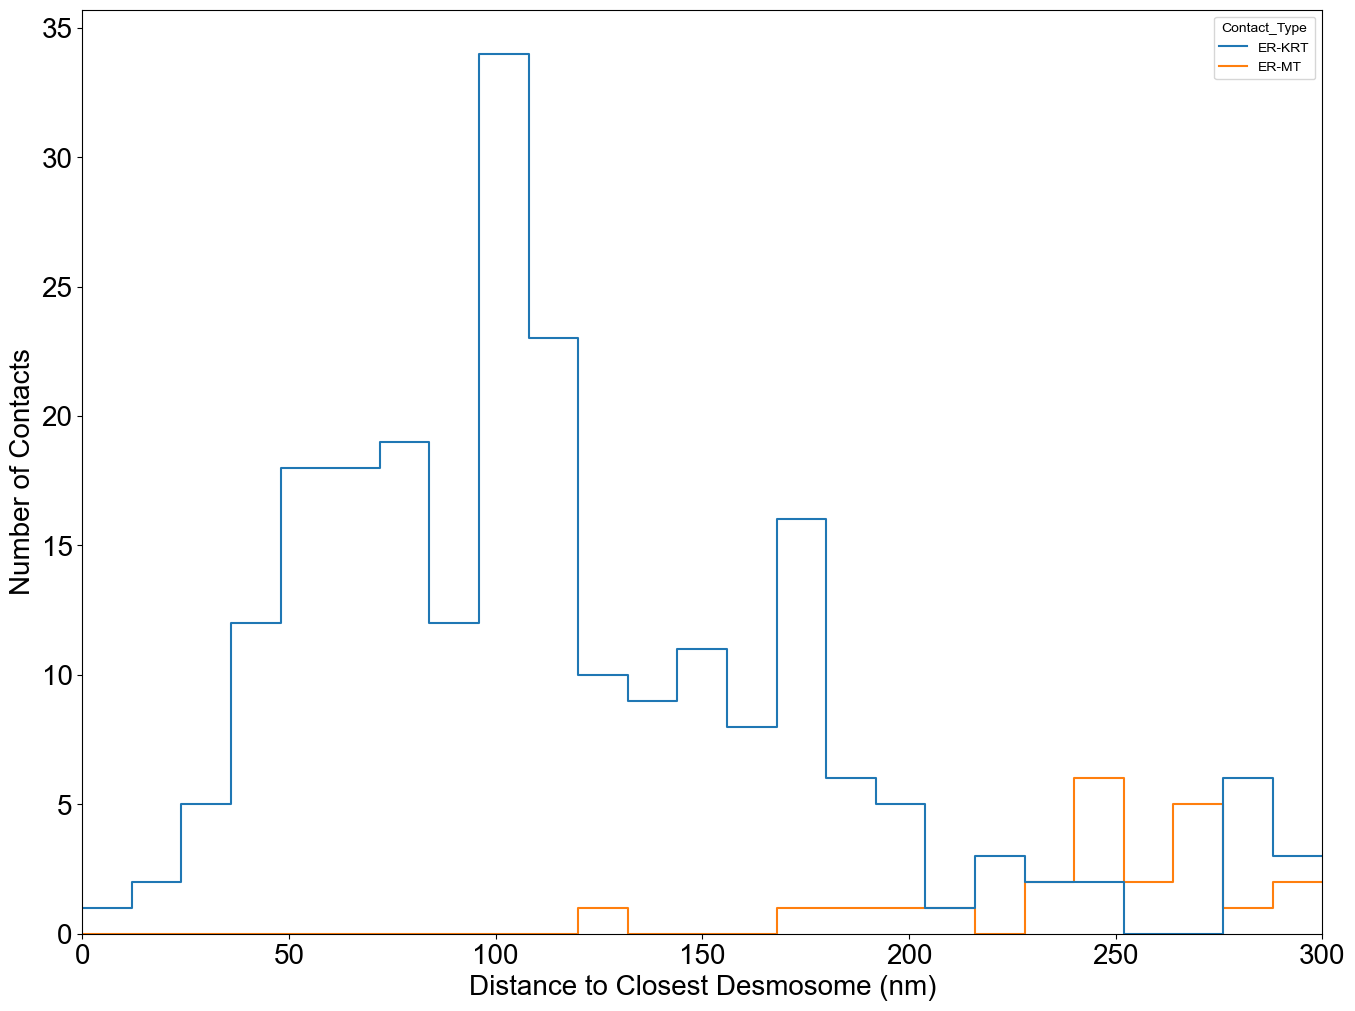

In [15]:
bin_edge_left = 0    # nm
bin_edge_right = 300 # nm
nbins = 25 
contact_distance = "20"
fig, ax = plt.subplots(figsize=(16, 12))

w = sns.histplot(data = df[df["Distance"] == contact_distance],
                 x = "Distance to closest DSM (nm)",
                 hue = "Contact_Type",
                 element = "step",
                 fill = False,
                 binrange = (bin_edge_left, bin_edge_right),
                 bins = nbins,
                 ax = ax
            )

fontsize_label = 20
fontsize_tick = 20

plt.tick_params(axis='both', which='major', labelsize = fontsize_tick)
plt.ylabel("Number of Contacts", fontsize = fontsize_label)
plt.xlabel("Distance to Closest Desmosome (nm)", fontsize = fontsize_label)

w.set_xlim(bin_edge_left, bin_edge_right)

plt.savefig(f"../plots/DSM-3_{contact_distance}nm-contacts_KRT-MT_0-{bin_edge_right}nm.pdf",
            bbox_inches = "tight")
plt.savefig(f"../plots/DSM-3_{contact_distance}nm-contacts_KRT-MT_0-{bin_edge_right}nm_transparent.pdf",
            bbox_inches = "tight", transparent = True)
#plt.savefig("../plots/DSM-3_300nm-contacts_KRT-MT.eps", format="eps")

In [42]:
a = df[(df["Distance"] == "20")].groupby("Contact_Type")["Distance to closest DSM (nm)"].describe()
a

,count,mean,std,min,25%,50%,75%,max
Contact_Type,,,,,,,,
ER-KRT,441.0,826.002249,1037.377689,8.944272,104.995237,283.689985,1126.459892,4209.963663
ER-MT,563.0,1640.400842,989.483380,128.561268,587.211900,1969.288178,2409.602189,4486.163562


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


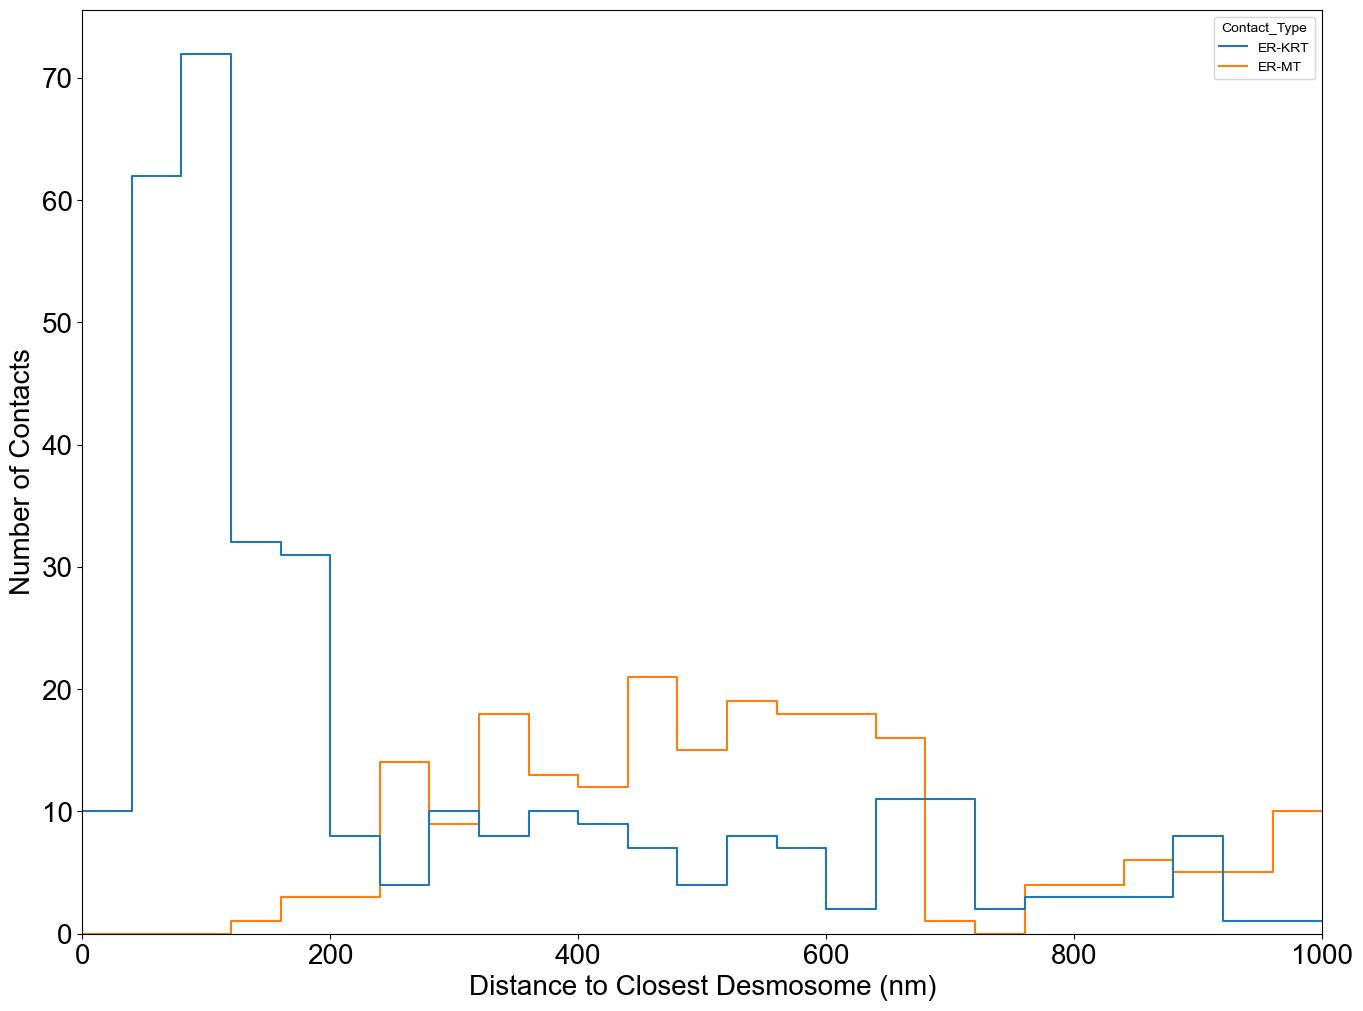

In [5]:
bin_edge_left = 0    # nm
bin_edge_right = 1000 # nm
nbins = 25 
contact_distance = "20"
fig, ax = plt.subplots(figsize=(16, 12))

w = sns.histplot(data = df[df["Distance"] == contact_distance],
                 x = "Distance to closest DSM (nm)",
                 hue = "Contact_Type",
                 element = "step",
                 fill = False,
                 binrange = (bin_edge_left, bin_edge_right),
                 bins = nbins,
                 ax = ax
            )

fontsize_label = 20
fontsize_tick = 20

plt.tick_params(axis='both', which='major', labelsize = fontsize_tick)
plt.ylabel("Number of Contacts", fontsize = fontsize_label)
plt.xlabel("Distance to Closest Desmosome (nm)", fontsize = fontsize_label)

w.set_xlim(bin_edge_left, bin_edge_right)

plt.savefig(f"../plots/DSM-3_{contact_distance}nm-contacts_KRT-MT_0-{bin_edge_right}nm.pdf",
            bbox_inches = "tight")
plt.savefig(f"../plots/DSM-3_{contact_distance}nm-contacts_KRT-MT_0-{bin_edge_right}nm_transparent.pdf",
            bbox_inches = "tight", transparent = True)
#plt.savefig("../plots/DSM-3_300nm-contacts_KRT-MT.eps", format="eps")

### 2D histogram showing that the vast majority of contacts are tiny

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


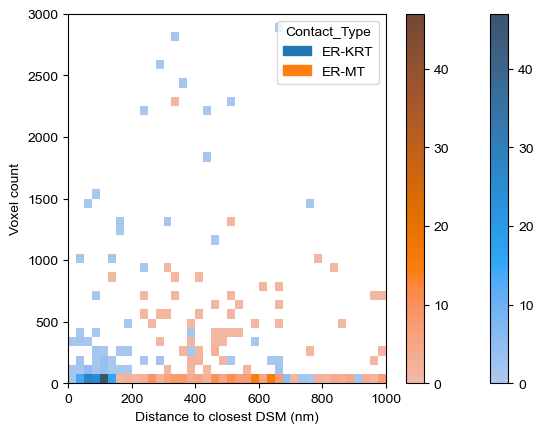

In [6]:
max_x = 1000
max_y = 3000
nbins = 40
contact_distance = "20"

z = sns.histplot(data = df[df["Distance"] == contact_distance],
                x = "Distance to closest DSM (nm)",
                y = "Voxel count",
                bins = nbins,
                binrange=((0, max_x), (0, max_y)),
                cbar = True,
                hue = "Contact_Type",
                #discrete=(True, True)
                )
z.set_xlim(0, max_x)
z.set_ylim(0, max_y)

plt.savefig(f"../plots/DSM-3_{contact_distance}nm-contacts_KRT-MT_2D-histogram_voxel-distance.pdf",
            bbox_inches = "tight")
plt.savefig(f"../plots/DSM-3_{contact_distance}nm-contacts_KRT-MT_2D-histogram_voxel-distance_transparent.pdf",
            bbox_inches = "tight", transparent = True)

### Contour map

(0.0, 5000.0)

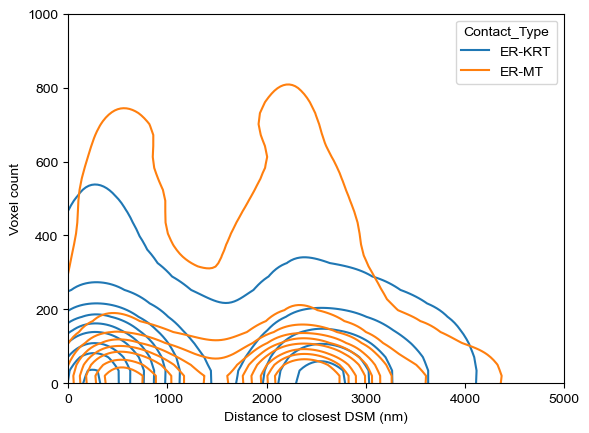

In [7]:
l = sns.kdeplot(df,
                x = "Distance to closest DSM (nm)",
                y = "Voxel count",
                hue = "Contact_Type",
                #levels = 5, thresh = .2
                #fill = True,
                #cmap="mako"
                #fill = True,
                )

l.set_ylim(0, 1000)
l.set_xlim(0, 5000)

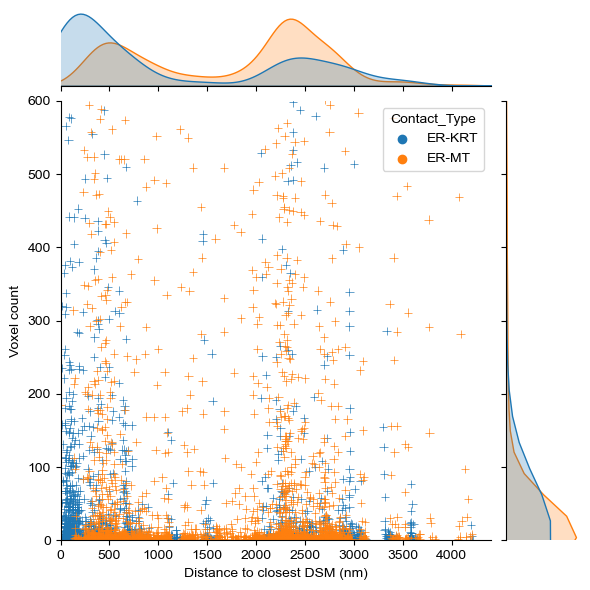

In [8]:
k = sns.jointplot(
    data = df,
    x = "Distance to closest DSM (nm)",
    y = "Voxel count",
    hue = "Contact_Type",
    xlim = (0, 4400),
    ylim = (0, 600),
    marker="+",
)
#k.set_ylim(0, 600)
#k.set_xlim(0, 4400)

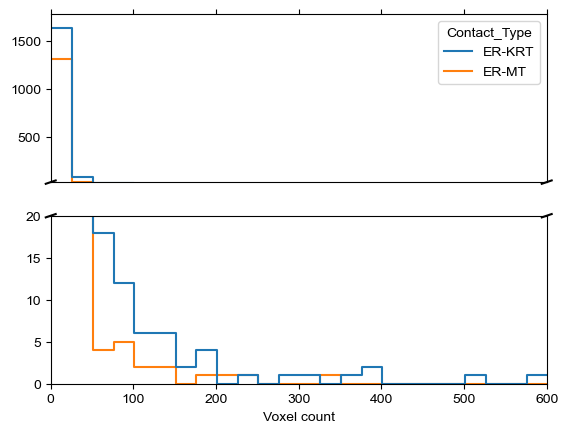

In [9]:
n, (ax1, ax2) = plt.subplots(ncols = 1, nrows=2, sharex=True)

binwidth = 25

ax1 = sns.histplot(data = df[df["Distance"] == "4"],
            x = "Voxel count",
            hue = "Contact_Type",
            element = "step",
            #log_scale = True,
            fill = False,
            binwidth = binwidth,
            ax = ax1
            )

ax2 = sns.histplot(data = df[df["Distance"] == "4"],
            x = "Voxel count",
            hue = "Contact_Type",
            element = "step",
            #log_scale = True,
            fill = False,
            binwidth = binwidth,
            ax = ax2,
            #bins=25
            )

ax1.set_ylim(25, 1775)
ax2.set_ylim(0, 20)

ax1.set_ylabel("")
ax2.set_ylabel("")

ax1.set_xlim(0, 600)
ax2.set_xlim(0, 600)

g.text(0.04, 0.55, "Count", va="center", rotation="vertical")

#ax1.get_legend().remove()
ax2.get_legend().remove()
# then create a new legend and put it to the side of the figure (also requires trial and error)
#ax2.legend(loc=(1.025, 0.5), title="Contact Type")
ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()

d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal 

#plt.savefig("../plots/ER_MT_KRT_contacts_4nm_histogram_by_voxel_count.pdf")
#plt.savefig("../plots/ER_MT_KRT_contacts_4nm_histogram_by_voxel_count_transparent.pdf", transparent = True)

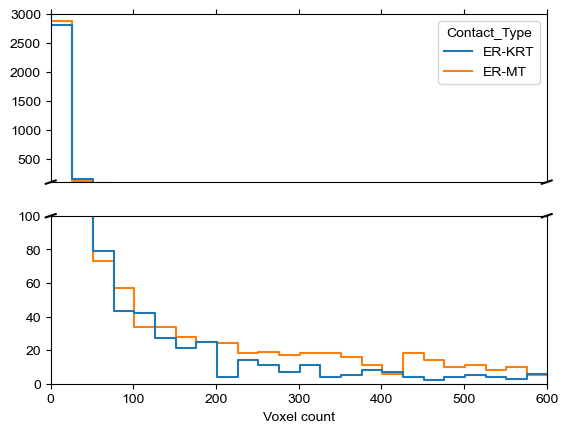

In [10]:
n, (ax1, ax2) = plt.subplots(ncols = 1, nrows=2, sharex=True)

binwidth = 25

ax1 = sns.histplot(data = df,
            x = "Voxel count",
            hue = "Contact_Type",
            element = "step",
            #log_scale = True,
            #       multiple="stack",
            fill = False,
            binwidth = binwidth,
            ax = ax1
            )

ax2 = sns.histplot(data = df,
            x = "Voxel count",
            hue = "Contact_Type",
            element = "step",
            #       multiple="stack",
            #log_scale = True,
            fill = False,
            binwidth = binwidth,
            ax = ax2,
            #bins=25
            )

ax1.set_ylim(100, 3000)
ax2.set_ylim(0, 100)

ax1.set_ylabel("")
ax2.set_ylabel("")

ax1.set_xlim(0, 600)
ax2.set_xlim(0, 600)

g.text(0.04, 0.55, "Count", va="center", rotation="vertical")

#ax1.get_legend().remove()
ax2.get_legend().remove()
# then create a new legend and put it to the side of the figure (also requires trial and error)
#ax2.legend(loc=(1.025, 0.5), title="Contact Type")
ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()

d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal 